In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error
import pickle

In [205]:
calorie = pd.read_csv('gym_members_exercise_tracking.csv')

In [206]:
calorie

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [207]:
calorie.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [208]:
calorie.shape

(973, 15)

In [209]:
calorie.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [210]:
calorie.drop(['Max_BPM','Avg_BPM','Resting_BPM','Fat_Percentage','Water_Intake (liters)','Workout_Frequency (days/week)','Experience_Level','BMI'], axis =1  , inplace = True)

In [211]:
calorie

,Age,Gender,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Workout_Type
0,56,Male,88.3,1.71,1.69,1313.0,Yoga
1,46,Female,74.9,1.53,1.30,883.0,HIIT
2,32,Female,68.1,1.66,1.11,677.0,Cardio
3,25,Male,53.2,1.70,0.59,532.0,Strength
4,38,Male,46.1,1.79,0.64,556.0,Strength
...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,1.57,1364.0,Strength
969,25,Male,66.6,1.61,1.38,1260.0,Strength
970,59,Female,60.4,1.76,1.72,929.0,Cardio
971,32,Male,126.4,1.83,1.10,883.0,HIIT


In [212]:
if 'Unnamed: 0' in calorie.columns:
    calorie.drop('Unnamed: 0', axis=1, inplace=True)

In [213]:
calorie

,Age,Gender,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Workout_Type
0,56,Male,88.3,1.71,1.69,1313.0,Yoga
1,46,Female,74.9,1.53,1.30,883.0,HIIT
2,32,Female,68.1,1.66,1.11,677.0,Cardio
3,25,Male,53.2,1.70,0.59,532.0,Strength
4,38,Male,46.1,1.79,0.64,556.0,Strength
...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,1.57,1364.0,Strength
969,25,Male,66.6,1.61,1.38,1260.0,Strength
970,59,Female,60.4,1.76,1.72,929.0,Cardio
971,32,Male,126.4,1.83,1.10,883.0,HIIT


In [214]:
q1_session = calorie['Session_Duration (hours)'].quantile(0.25)
q3_session = calorie['Session_Duration (hours)'].quantile(0.75)
IQR_session = q3_session - q1_session
lower_bound_session = q1_session - (1.5 * IQR_session)
upper_bound_session = q3_session + (1.5 * IQR_session)

outliers_session = calorie[(calorie['Session_Duration (hours)'] < lower_bound_session) | (calorie['Session_Duration (hours)'] > upper_bound_session)]
print(len(outliers_session))

calorie = calorie[(calorie['Session_Duration (hours)'] >= lower_bound_session) & (calorie['Session_Duration (hours)'] <= upper_bound_session)]

0


<Axes: xlabel='Weight (kg)'>

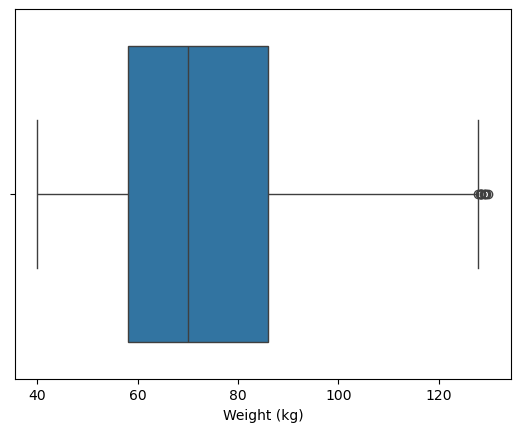

In [215]:
sns.boxplot(x = calorie['Weight (kg)'])

In [216]:
q1_wg = calorie['Weight (kg)'].quantile(0.25)
q3_wg = calorie['Weight (kg)'].quantile(0.75)
IQR_wg = q3_wg - q1_wg
lower_bound_wg = q1_wg - (1.5 * IQR_wg)
upper_bound_wg = q3_wg + (1.5 * IQR_wg)

outliers_wg = calorie[(calorie['Weight (kg)'] < lower_bound_wg) | (calorie['Weight (kg)'] > upper_bound_wg)]
print(len(outliers_wg))

calorie = calorie[(calorie['Weight (kg)'] >= lower_bound_wg) & (calorie['Weight (kg)'] <= upper_bound_wg)]

9


<Axes: xlabel='Weight (kg)'>

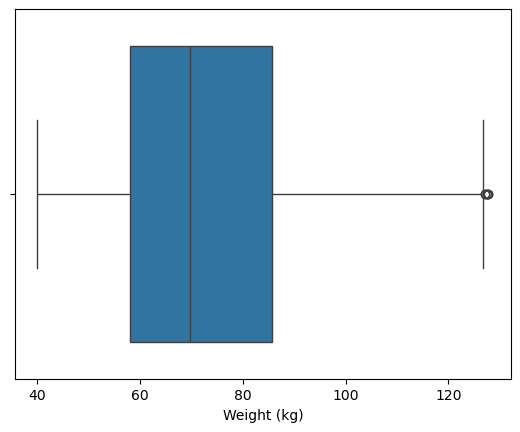

In [217]:
sns.boxplot(x = calorie['Weight (kg)'])

<Axes: xlabel='Height (m)'>

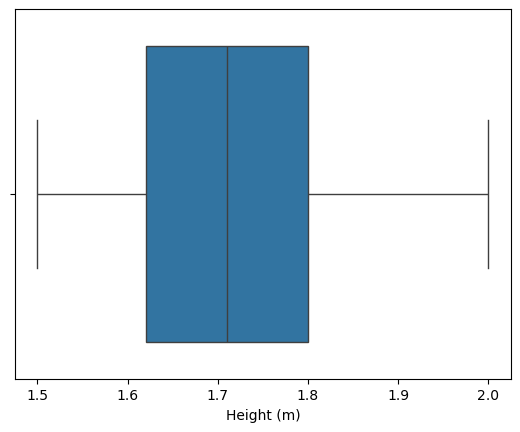

In [218]:
sns.boxplot(x = calorie['Height (m)'])

In [219]:
q1_height = calorie['Height (m)'].quantile(0.25)
q3_height = calorie['Height (m)'].quantile(0.75)
IQR_height = q3_height - q1_height
lower_bound_height = q1_height - (1.5 * IQR_height)
upper_bound_height = q3_height + (1.5 * IQR_height)
outliers_height = calorie[(calorie['Height (m)'] < lower_bound_height) | (calorie['Height (m)'] > upper_bound_height)]
print(len(outliers_height))
calorie = calorie[(calorie['Height (m)'] >= lower_bound_height) & (calorie['Height (m)'] <= upper_bound_height)]

0


<Axes: xlabel='Calories_Burned'>

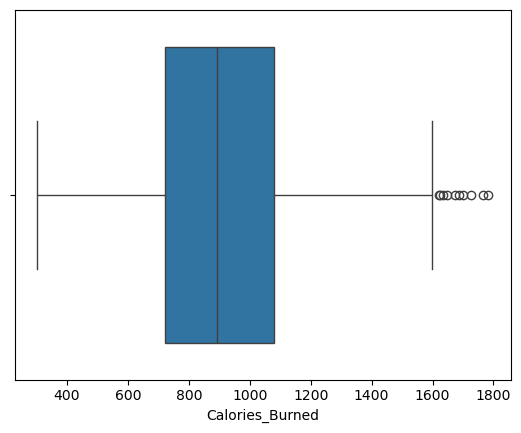

In [220]:
sns.boxplot(x = calorie['Calories_Burned'])

In [221]:
q1_calorie = calorie['Calories_Burned'].quantile(0.25)
q3_calorie = calorie['Calories_Burned'].quantile(0.75)
IQR_calorie = q3_calorie - q1_calorie
lower_bound_calorie = q1_calorie - (1.5 * IQR_calorie)
upper_bound_calorie = q3_calorie + ( 1.5 * IQR_calorie)
outliers_calorie = calorie[(calorie['Calories_Burned'] < lower_bound_calorie) | (calorie['Calories_Burned'] > upper_bound_calorie)]
print(len(outliers_calorie))
calorie = calorie[(calorie['Calories_Burned'] >= lower_bound_calorie) & (calorie['Calories_Burned'] <= upper_bound_calorie)]

10


<Axes: xlabel='Calories_Burned'>

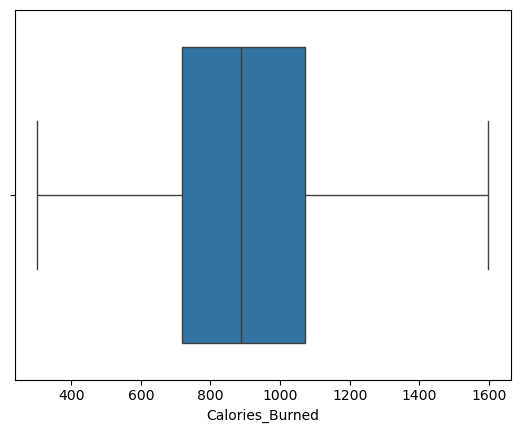

In [222]:
sns.boxplot(x = calorie['Calories_Burned'])

In [223]:
# One-hot encoding for categorical features
dummies = pd.get_dummies(calorie[['Workout_Type', 'Gender']], drop_first=True)
calorie = pd.concat([calorie.drop(['Workout_Type', 'Gender'], axis=1), dummies], axis=1)


In [224]:
calorie

,Age,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Gender_Male
0,56,88.3,1.71,1.69,1313.0,False,False,True,True
1,46,74.9,1.53,1.30,883.0,True,False,False,False
2,32,68.1,1.66,1.11,677.0,False,False,False,False
3,25,53.2,1.70,0.59,532.0,False,True,False,True
4,38,46.1,1.79,0.64,556.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,1.57,1364.0,False,True,False,True
969,25,66.6,1.61,1.38,1260.0,False,True,False,True
970,59,60.4,1.76,1.72,929.0,False,False,False,False
971,32,126.4,1.83,1.10,883.0,True,False,False,True


In [225]:
# Features and Target
X = calorie.drop("Calories_Burned", axis=1)
y = calorie["Calories_Burned"]

# Save feature order
feature_order = list(X.columns)

In [226]:
with open('feature_order.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

In [227]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
print('r2_score',r2_score(y_pred , y_test))


r2_score 0.8419810463534301


In [228]:
feature_order = X.columns.tolist()
with open("feature_order.pkl", "wb") as f:
    pickle.dump(feature_order, f)


In [229]:
import pickle

with open('calorie_burned_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [230]:
calorie.to_csv("cleaned_calorie_data.csv", index=False)